<a href="https://colab.research.google.com/github/kha-dija1/aslprep/blob/master/DnCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 9.png to 9.png
User uploaded file "9.png" with length 7555 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving results.txt to results (1).txt
User uploaded file "results.txt" with length 0 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving log.csv to log.csv
Saving model.h5 to model.h5
Saving model.json to model.json
User uploaded file "log.csv" with length 0 bytes
User uploaded file "model.h5" with length 2349584 bytes
User uploaded file "model.json" with length 21926 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving model_001.hdf5 to model_001.hdf5
User uploaded file "model_001.hdf5" with length 0 bytes


In [ ]:
import glob
#import os
import cv2
import numpy as np
#from multiprocessing import Pool


patch_size, stride = 40, 10
aug_times = 1
scales = [1, 128, 128, 1]
batch_size = 128


def show(x,title=None,cbar=False,figsize=None):
  import matplotlib.pyplot as plt
  plt.figure(figsize=figsize)
  plt.imshow(x,interpolation='nearest',cmap='gray')
  if title:
    plt.title(title)
  if cbar:
    plt.colorbar()
  plt.show()

def data_aug(img, mode=0):
  if mode == 0:
    return img
  elif mode == 1:
    return np.flipud(img)
  elif mode == 2:
    return np.rot90(img)
  elif mode == 3:
    return np.flipud(np.rot90(img))
  elif mode == 4:
    return np.rot90(img, k=2)
  elif mode == 5:
    return np.flipud(np.rot90(img, k=2))
  elif mode == 6:
    return np.rot90(img, k=3)
  elif mode == 7:
    return np.flipud(np.rot90(img, k=3))

def gen_patches(file_name):
  # read image
  img = cv2.imread(file_name, 0)  # gray scale
  h, w = img.shape
  patches = []
  for s in scales:
    h_scaled, w_scaled = int(h*s),int(w*s)
    img_scaled = cv2.resize(img, (h_scaled,w_scaled), interpolation=cv2.INTER_CUBIC)
    # extract patches
    for i in range(0, h_scaled-patch_size+1, stride):
      for j in range(0, w_scaled-patch_size+1, stride):
        x = img_scaled[i:i+patch_size, j:j+patch_size]
        #patches.append(x)
        # data aug
        for k in range(0, aug_times):
          x_aug = data_aug(x, mode=np.random.randint(0,8))
          patches.append(x_aug)
  return patches

def datagenerator(data_dir='/content/9.png',verbose=False):
  file_list = glob.glob(data_dir+'/*.png')  # get name list of all .png files
  # initrialize
  data = []
  # generate patches
  for i in range(len(file_list)):
    patch = gen_patches(file_list[i])
    data.append(patch)
    if verbose:
      print(str(i+1)+'/'+ str(len(file_list)) + ' is done ^_^')
  data = np.array(data, dtype='uint8')
  discard_n = len(data)-len(data)//batch_size*batch_size;
  data = np.delete(data,range(discard_n),axis = 0)
  print('^_^-training data finished-^_^')
  return data

if __name__ == '__main__':
  data = datagenerator(data_dir='/content/9.png')

^_^-training data finished-^_^


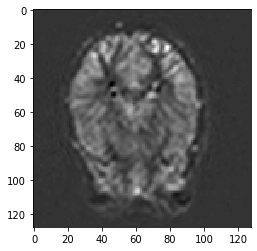

In [ ]:
from matplotlib import image
img = image.imread("9.png")
show(img,title=None,cbar=False,figsize=None)

In [ ]:
import argparse
import os, time, datetime
#import PIL.Image as Image
import numpy as np
from keras.models import load_model, model_from_json
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity
from skimage.io import imread, imsave

In [ ]:
import sys
sys.argv=['']
del sys

In [ ]:
parser = argparse.ArgumentParser()

In [ ]:
def parse_args():
  parser.parse_args()
  parser.add_argument('--set_dir', default='/content/9.png', type=str, help='directory of test dataset')
  parser.add_argument('--sigma', default=25, type=int, help='noise level')
  parser.add_argument('--model_dir1', default='/content/model.h5', type=str, help='directory of the model')
  parser.add_argument('--model_dir2', default='/content/model.json', type=str, help='directory of the model')
  parser.add_argument('--model_name', default='model_001.hdf5', type=str, help='the model name')
  parser.add_argument('--result_dir', default='/content/results.txt', type=str, help='directory of results')
  parser.add_argument('--save_result', default=0, type=int, help='save the denoised image, 1 or 0')
  return parser.parse_args()

In [ ]:
parse_args()

Namespace(model_dir1='/content/model.h5', model_dir2='/content/model.json', model_name='model_001.hdf5', result_dir='/content/results.txt', save_result=0, set_dir='/content/9.png', sigma=25)

In [ ]:
def to_tensor(img):
  if img.ndim == 2:
    return img[np.newaxis,...,np.newaxis]
  elif img.ndim == 3:
    return np.moveaxis(img,2,0)[...,np.newaxis]

In [ ]:
to_tensor(img)

array([[[[0.16470589],
         [0.16470589],
         [0.16470589],
         ...,
         [0.16470589],
         [0.16470589],
         [0.16470589]],

        [[0.16470589],
         [0.16470589],
         [0.16470589],
         ...,
         [0.16470589],
         [0.16470589],
         [0.16470589]],

        [[0.16470589],
         [0.16470589],
         [0.16470589],
         ...,
         [0.16470589],
         [0.16470589],
         [0.16470589]],

        ...,

        [[0.16470589],
         [0.16470589],
         [0.16470589],
         ...,
         [0.16470589],
         [0.16470589],
         [0.16470589]],

        [[0.16470589],
         [0.16470589],
         [0.16470589],
         ...,
         [0.16470589],
         [0.16470589],
         [0.16470589]],

        [[0.16470589],
         [0.16470589],
         [0.16470589],
         ...,
         [0.16470589],
         [0.16470589],
         [0.16470589]]]], dtype=float32)

In [ ]:
def from_tensor(img):
    return np.squeeze(np.moveaxis(img[...,0],0,-1))

In [ ]:
from_tensor(img)

array([0.16470589, 0.16470589, 0.16470589, 0.16470589, 0.16862746,
       0.16470589, 0.16470589, 0.16470589, 0.16470589, 0.16470589,
       0.16862746, 0.16862746, 0.16470589, 0.16470589, 0.16470589,
       0.16470589, 0.16470589, 0.16470589, 0.16470589, 0.16470589,
       0.16470589, 0.16470589, 0.16470589, 0.16470589, 0.16470589,
       0.16470589, 0.16470589, 0.16470589, 0.16470589, 0.16470589,
       0.16470589, 0.16470589, 0.16470589, 0.16470589, 0.16470589,
       0.16470589, 0.16470589, 0.16470589, 0.16470589, 0.16078432,
       0.16470589, 0.16470589, 0.16470589, 0.16470589, 0.16470589,
       0.16470589, 0.16470589, 0.16470589, 0.16078432, 0.16470589,
       0.16470589, 0.16470589, 0.16078432, 0.16078432, 0.16470589,
       0.16470589, 0.16470589, 0.16470589, 0.16078432, 0.16078432,
       0.16470589, 0.16470589, 0.16078432, 0.16470589, 0.16470589,
       0.16470589, 0.16470589, 0.16470589, 0.16862746, 0.16470589,
       0.16078432, 0.16470589, 0.16862746, 0.16470589, 0.16470

In [ ]:
def log(*args,**kwargs):
     print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S:"),*args,**kwargs)

In [ ]:
def save_result(result,path):
  path = path if path.find('.') != -1 else path+'.png'
  ext = os.path.splitext(path)[-1]
  if ext in ('.txt','.dlm'):
    np.savetxt(path,result,fmt='%2.4f')
  else:
    imsave(path,np.clip(result,0,1))

In [ ]:
arr=np.array(img)
newarr = arr.reshape(arr.shape[0], arr.shape[1])
save_result(newarr,'/content/results.txt')

In [ ]:
def show(x,title=None,cbar=False,figsize=None):
  import matplotlib.pyplot as plt
  plt.figure(figsize=figsize)
  plt.imshow(x,interpolation='nearest',cmap='gray')
  if title:
    plt.title(title)
  if cbar:
    plt.colorbar()
  plt.show()

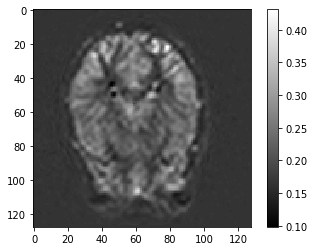

In [ ]:
show(img,title=None,cbar=True,figsize=None)

In [ ]:
if __name__ == '__main__':
  args = parser.parse_args()


    # =============================================================================
    #     # serialize model to JSON
    #     model_json = model.to_json()
    #     with open("model.json", "w") as json_file:
    #         json_file.write(model_json)
    #     # serialize weights to HDF5
    #     model.save_weights("model.h5")
    #     print("Saved model")
    # =============================================================================
  if not os.path.exists(os.path.join(args.model_dir1,args.model_dir2, args.model_name)):
    # load json and create model
    json_file = open(os.path.join('model.json'), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights(os.path.join('model.h5'))
    log('load trained model on Train400 dataset by kai')
  else:
    model = load_model(os.path.join(args.model_dir1, args.model_dir2),compile=False)
    log('load trained model')

  if not os.path.exists(args.result_dir):
    os.mkdir(args.result_dir)
    psnrs = []
    ssims = []

    for im in os.listdir(os.path.join(args.set_dir)):
      if im.endswith(".jpg") or im.endswith(".bmp") or im.endswith(".png"):
        #x = np.array(Image.open(os.path.join(args.set_dir,set_cur,im)), dtype='float32') / 255.0
        x = np.array(imread(os.path.join(args.set_dir,im)), dtype=np.float32) / 255.0
        np.random.seed(seed=0) # for reproducibility
        y = x + np.random.normal(0, args.sigma/255.0, x.shape) # Add Gaussian noise without clipping
        y = y.astype(np.float32)
        y_  = to_tensor(y)
        start_time = time.time()
        x_ = model.predict(y_) # inference
        elapsed_time = time.time() - start_time
        print('%10s : %10s : %2.4f second'%(im,elapsed_time))
        x_=from_tensor(x_)
        psnr_x_ = peak_signal_noise_ratio(x, x_)
        ssim_x_ = structural_similarity(x, x_)
        if args.save_result:
          name, ext = os.path.splitext(im)
          show(np.hstack((y,x_))) # show the image
          save_result(x_,path=os.path.join(args.result_dir,name+'_dncnn'+ext)) # save the denoised image
        psnrs.append(psnr_x_)
        ssims.append(ssim_x_)

    psnr_avg = np.mean(psnrs)
    ssim_avg = np.mean(ssims)
    psnrs.append(psnr_avg)
    ssims.append(ssim_avg)

    if args.save_result:
      save_result(np.hstack((psnrs,ssims)),path=os.path.join(args.result_dir,'results.txt'))

    log('Datset: {0:10s} \n  PSNR = {1:2.2f}dB, SSIM = {2:1.4f}'.format(psnr_avg, ssim_avg))

2022-06-11 15:32:03: load trained model on Train400 dataset by kai


In [ ]:
x = np.array(imread(os.path.join(args.set_dir)), dtype=np.float32) / 255.0
y = x + np.random.normal(0, args.sigma/255.0, x.shape) # Add Gaussian noise without clipping
y = y.astype(np.float32)
y_  = to_tensor(y)
x_ = model.predict(y_) # inference
x_=from_tensor(x_)
psnr_x_ = peak_signal_noise_ratio(x, x_)

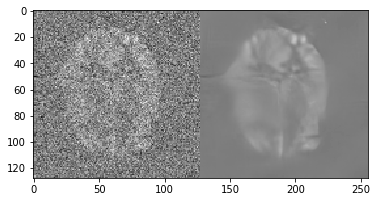

In [ ]:
show(np.hstack((y,x_))) # show the image

In [ ]:
print(psnr_x_)

35.40099268796511


In [ ]:
ssim_x_ = structural_similarity(x, x_)
print(ssim_x_)

0.9521779819799718
